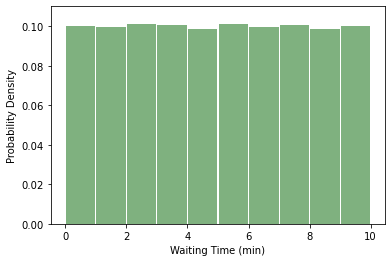

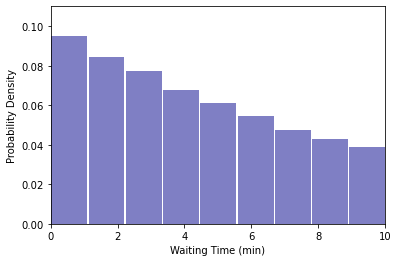

Simulated Answer for Part 1: 0.3676


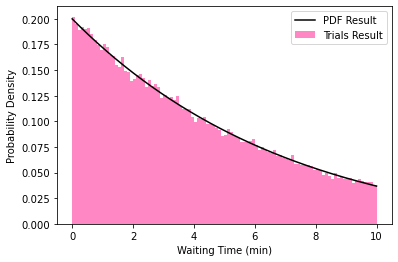

In [3]:
#QUESTION 1: BUS LINES 

#1.1
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import math 

#repeating r.v. generation for x number of trials 
trials = 100000

#modeling Company A's distribution using Uniform
A = sts.uniform(scale=10).rvs(trials)

plt.hist(A, density=True, bins=10, color="darkgreen", alpha=0.5, label="Bus A", rwidth=0.965)
plt.xlabel("Waiting Time (min)")
plt.ylabel("Probability Density")
plt.ylim([0.0, 0.11])
plt.show()

#modeling Company B's distribution using Exponential
B = sts.expon(scale=10).rvs(trials)
plt.hist(B, density=True, bins=100, color="darkblue", alpha=0.5, label="Bus A", rwidth=0.965)
plt.xlabel("Waiting Time (min)")
plt.ylabel("Probability Density")
#using these parameters to scale it to Company A for visual comparison
plt.xlim([0.0, 10])
plt.ylim([0.0, 0.11])
plt.show()


#1.3
#checking answer for part 1:
#creating a function to find how often B arrives before A
def checkans(): 
    count = 0
    for x in range(trials): 
        if B[x] < A[x]: 
            #appending to the count if B is faster than A 
            count += 1 
    return (count/trials) #the percent of the time that B arrived before A
print("Simulated Answer for Part 1:", checkans())

#checking answer for part 2: 
#creating 
T = []
T = np.minimum(A, B)

#creating a range of values to use for the PDF we calculated above
xrange = np.linspace(0, 10, 1000) 
PDF_time = []

#this loop feeds the values created in the xrange through the PDF, outputting values to plot on top of the trials.
for y in range(1000):
    PDF_time.append(-(xrange[y]-20)*(math.e**(-xrange[y]/10))/(100))
    
#plotting the trials histogram (using the PDF_time list that we simulated) and our PDF equation result in Part 2
plt.hist(T, density=True, bins=100, color='hotpink', alpha=0.8, label="Trials Result")
plt.xlabel("Waiting Time (min)")
plt.ylabel("Probability Density")
plt.plot(xrange, PDF_time, color='black', label='PDF Result')
plt.legend()
plt.show()


In [2]:
#QUESTION 2: COUNTING VOTES
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import random 

l = 14 #assigning a random value to lambda 
p = 0.45 #assigning a random probability to p 

trials = 100000

sample = sts.poisson(l).rvs(trials)

D = []
for x in range(trials):
    #this list appends either True or False values depending on the random variable 
    #between 0 and 1. If below p, then True and if above p, then False 
    poll = [random.random() < p for _ in range(sample[x])]
    
    #this calculates the difference between the votes for vs. against the proposal
    diff = poll.count(True) - poll.count(False)
    
    #appending the diff value for each trial
    D.append(diff)

#Printing out our simulated and declared values to compare 
print("Simulated Expected Value:", np.mean(D))
print("Simulated Variance", np.var(D))
print("True Expected Value:", ((2*p-1)*l))
print("True Variance:", l)



Simulated Expected Value: -1.40818
Simulated Variance 13.9928490876
True Expected Value: -1.3999999999999997
True Variance: 14


In [3]:
#QUESTION 3: HEREDITARY HEIGHTS
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

#setting the values for the standard normal distribution, 
#used in normal r.v.s

mu = 0
sigma = 1
n = 1

trials = 100000
results = []
for i in range(trials):
    p1 = np.random.normal(mu, sigma, n)
    p2 = np.random.normal(mu, sigma, n)
    c1 = np.random.normal(mu, sigma, n)
    c2 = np.random.normal(mu, sigma, n)
    c3 = np.random.normal(mu, sigma, n)
    c4 = np.random.normal(mu, sigma, n)

    pval = [p1, p2]
    cval = [c1, c2, c3, c4]
    
    count = 0
    for x in range(len(cval)): 
        if cval[x] > pval[0] and pval[1]: 
            count += 1
    results.append(count)

print(sum(results)/trials)

2.00323
